### Generating Training Dataset

In [27]:
import numpy as np

def F(x1, x2):
    return np.sin(np.pi * x1 / 2.0) * np.cos(np.pi * x2 / 4.0)

A = 2

nb_samples = 1000
X_train = np.random.uniform(-A, A, (nb_samples, 2))
y_train = np.vectorize(F)(X_train[:, 0], X_train[:, 1])

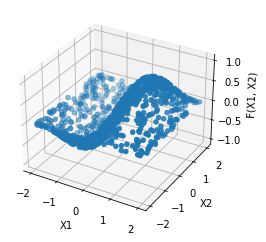

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train[:, 0], X_train[:, 1], y_train, marker='o')

n = 100

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('F(X1, X2)')

plt.show()

### Models

In [29]:
from keras.models import Sequential
model = Sequential()

#### The network

In [30]:
from keras.layers import Dense, Activation
nb_units = 20
model.add(Dense(nb_units, input_shape=(2, )))
#model.add(Dense(nb_units, input_shape=(2, ), activation='relu'))
model.add(Activation('relu'))
model.add(Dense(1))

#### The optimization method

In [31]:
from tensorflow.keras.optimizers import SGD
sgd = SGD(lr=.01,
         decay=1e-6,
         momentum=.9,
         nesterov=True)

In [32]:
model.compile(loss='mean_squared_error', optimizer=sgd)

#### Running the optimization

In [33]:
hist = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
32/32 [==============================] - 0s 823us/step - loss: 0.3187
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 0.1218
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 0.1142
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 0.1081
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 0.1028
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 0.0968
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 0.0901
Epoch 8/10
32/32 [==============================] - 0s 977us/step - loss: 0.0825
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: 0.0754
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 0.0675


### Prediction

In [34]:
x = [1.5, 0.5]
print(F(x[0], x[1]))

x = np.array(x).reshape(1, 2)
print(x)
print(model.predict(x))
print(model.predict(x)[0][0])

0.6532814824381883
[[1.5 0.5]]
[[0.5177834]]
0.5177834


In [35]:
y_pred = model.predict(X_train)#np.vectorize(F)(X_train[:, 0], X_train[:, 1])

In [36]:
%matplotlib
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train[:, 0], X_train[:, 1], y_train, marker='o')
ax.scatter(X_train[:, 0], X_train[:, 1], y_pred, marker='^')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
#ax.set_zlabel('F(X1, X2)')

plt.show()

Using matplotlib backend: Qt5Agg
